In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
GND13Sto = candels[-2]

nearby = GND13Sto[1][1]
host = GND13Sto[1][2]
lc = GND13Sto[1][3]

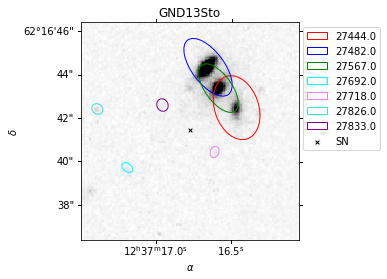

In [4]:
nick = GND13Sto[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Sto[1][0]['RA'],GND13Sto[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.012,val_max = .15 )

In [7]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))
#host[0].mass

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
27444 1.0700 -1.0000 1.0670 0.978 1.204
27482 0.5600  0.5572 0.5562 0.510 0.600
27567 0.5600  0.5573 2.0951 2.009 2.191
27692 1.2600 -1.0000 1.2587 0.166 3.734
27718 1.2500 -1.0000 1.2490 0.772 2.085
27826 0.9300 -1.0000 0.9251 0.635 1.188
27833 1.6800 -1.0000 1.6766 1.567 1.842


## There is no obvious host

## B ~ 27657 was chosen as the host (since is nearest I'm assuming)

## Evernote has Stone as a Ia at zspec = 1.8 

## based on the z(IRS) (Alex Pope) of object 27567, in my catalog zpec = 0.56 I think it is safe to assume the other is more up to date; there is confidence in that value in evernote.

## This galaxy is interesting as very bright in IR but faint optically, very dead

## Aside from the three bright objects there are fainter 'closer' (just based on core not size) objects F,E,D in your postage stamps.  

## My catalog doesn't know about the nearest E z~2.5.  

## Catalog has F~27833 zphot = 1.68 ~ [1.57,1.84]; unknown z reported in the evernote. Is consistent with the clustering of galaxies around z ~ 1.8 idea (see below)

## Don't think need to reevaluate

## https://iopscience.iop.org/article/10.1088/0004-6256/148/1/13/pdf

## 'SN GND13Sto is separated by several arcseconds from all nearby galaxies. Of the six galaxies within 5 arcsec of the SN position, five have a photo-z distribution that peaks close to z = 1.8, including one with a spectroscopic redshift from the Spitzer Infrared Spectrograph of z = 1.80 ± 0.02 (Murphy et al. 2009). This is suggestive of a small cluster or group of galaxies at that redshift, with SN GND13Sto possibly associated with a low surface brightness group member or tidal stream. Indeed, applying STARDUST to the well-sampled SN GND13Sto light curve (and allowing for a broad redshift range, z = 1.8 ± 1.2), we find the maximum likelihood match is an SN Ia template at z = 1.86 ± 0.05.'